## Regression Evening Exercise: Housing in Boston

Your assignment is to predict the price of housing in Boston based on the features of the housing.

Since this is a group exercise, there will be opportunities to collaborate, but be sure to write your own code so that you can reinforce the key concepts learned in today's lessons.

1. (__Individual__) Use `sklearn` to fit a multiple linear regression model.
  - (__Group discussion__) How will you decide which features to include?
  
  
2. (__Individual__) What is the coefficient of determination (r-squared) for your model? What about the root mean squared error (RMSE)?


3. (__Group discussion__) Compare your results to make sure you ran your code successfully. Can you improve upon your original model?
  - (__Individual and group discussion__) Look at the correlations of the features to the target variable as well as the coefficients of your original model. How could you use that information to select a better set of features? 
  - (__Group discussion__) What features could you create that might be useful (e.g., categorical features based on binning numeric features). How do you handle categorical features in a linear regression model?
  - (__Individual__) Update your model with the improvements you discussed as a group.


4. (__Individual__) Make a scatterplot of the observations in the test data, where the x-axis is the actual price and the y-axis is the predicted price from your best model. What does this plot tell you about the model you created?

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
import seaborn as sns

In [151]:
seed = 0
np.random.seed(seed)

In [152]:
# load the Boston housing dataset from sklearn
boston = load_boston()
bos = pd.DataFrame(boston.data)

# give our DataFrame the appropriate feature names
bos.columns = boston.feature_names

# Add the target variable to the DataFrame
bos['Price'] = boston.target

In [153]:
# characteristics of the data for your reference
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [154]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [155]:
# use a standard train/test split for comparing model performance across students
# Split the data into a train test split
bos_train_X, bos_test_X, bos_train_y, bos_test_y = train_test_split(bos.drop(['Price'], axis = 1), bos['Price'], test_size=0.25, random_state=seed, shuffle=True)

In [156]:
frame=[bos_train_X,bos_train_y]
train=pd.concat(frame,axis=1)
frame=[bos_test_X,bos_test_y]
test=pd.concat(frame,axis=1)

In [157]:
test.shape

(127, 14)

In [158]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46,18.5
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05,33.2
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12,13.1
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,7.5


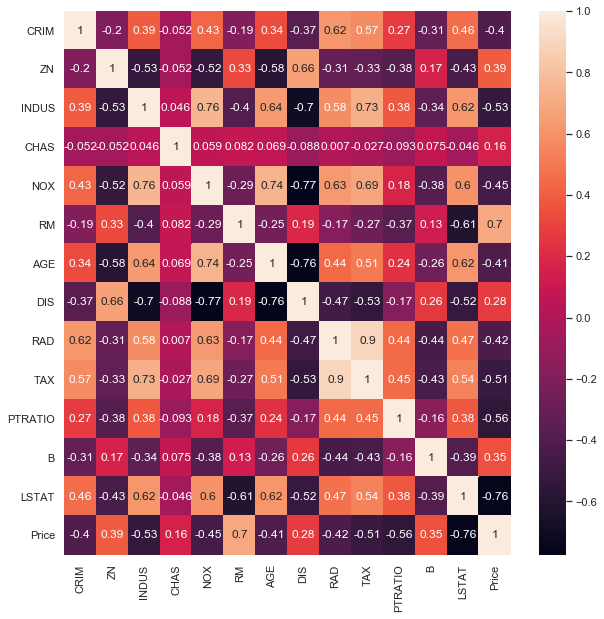

In [159]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
#B,DIS,CHAS,ZN can be deleted

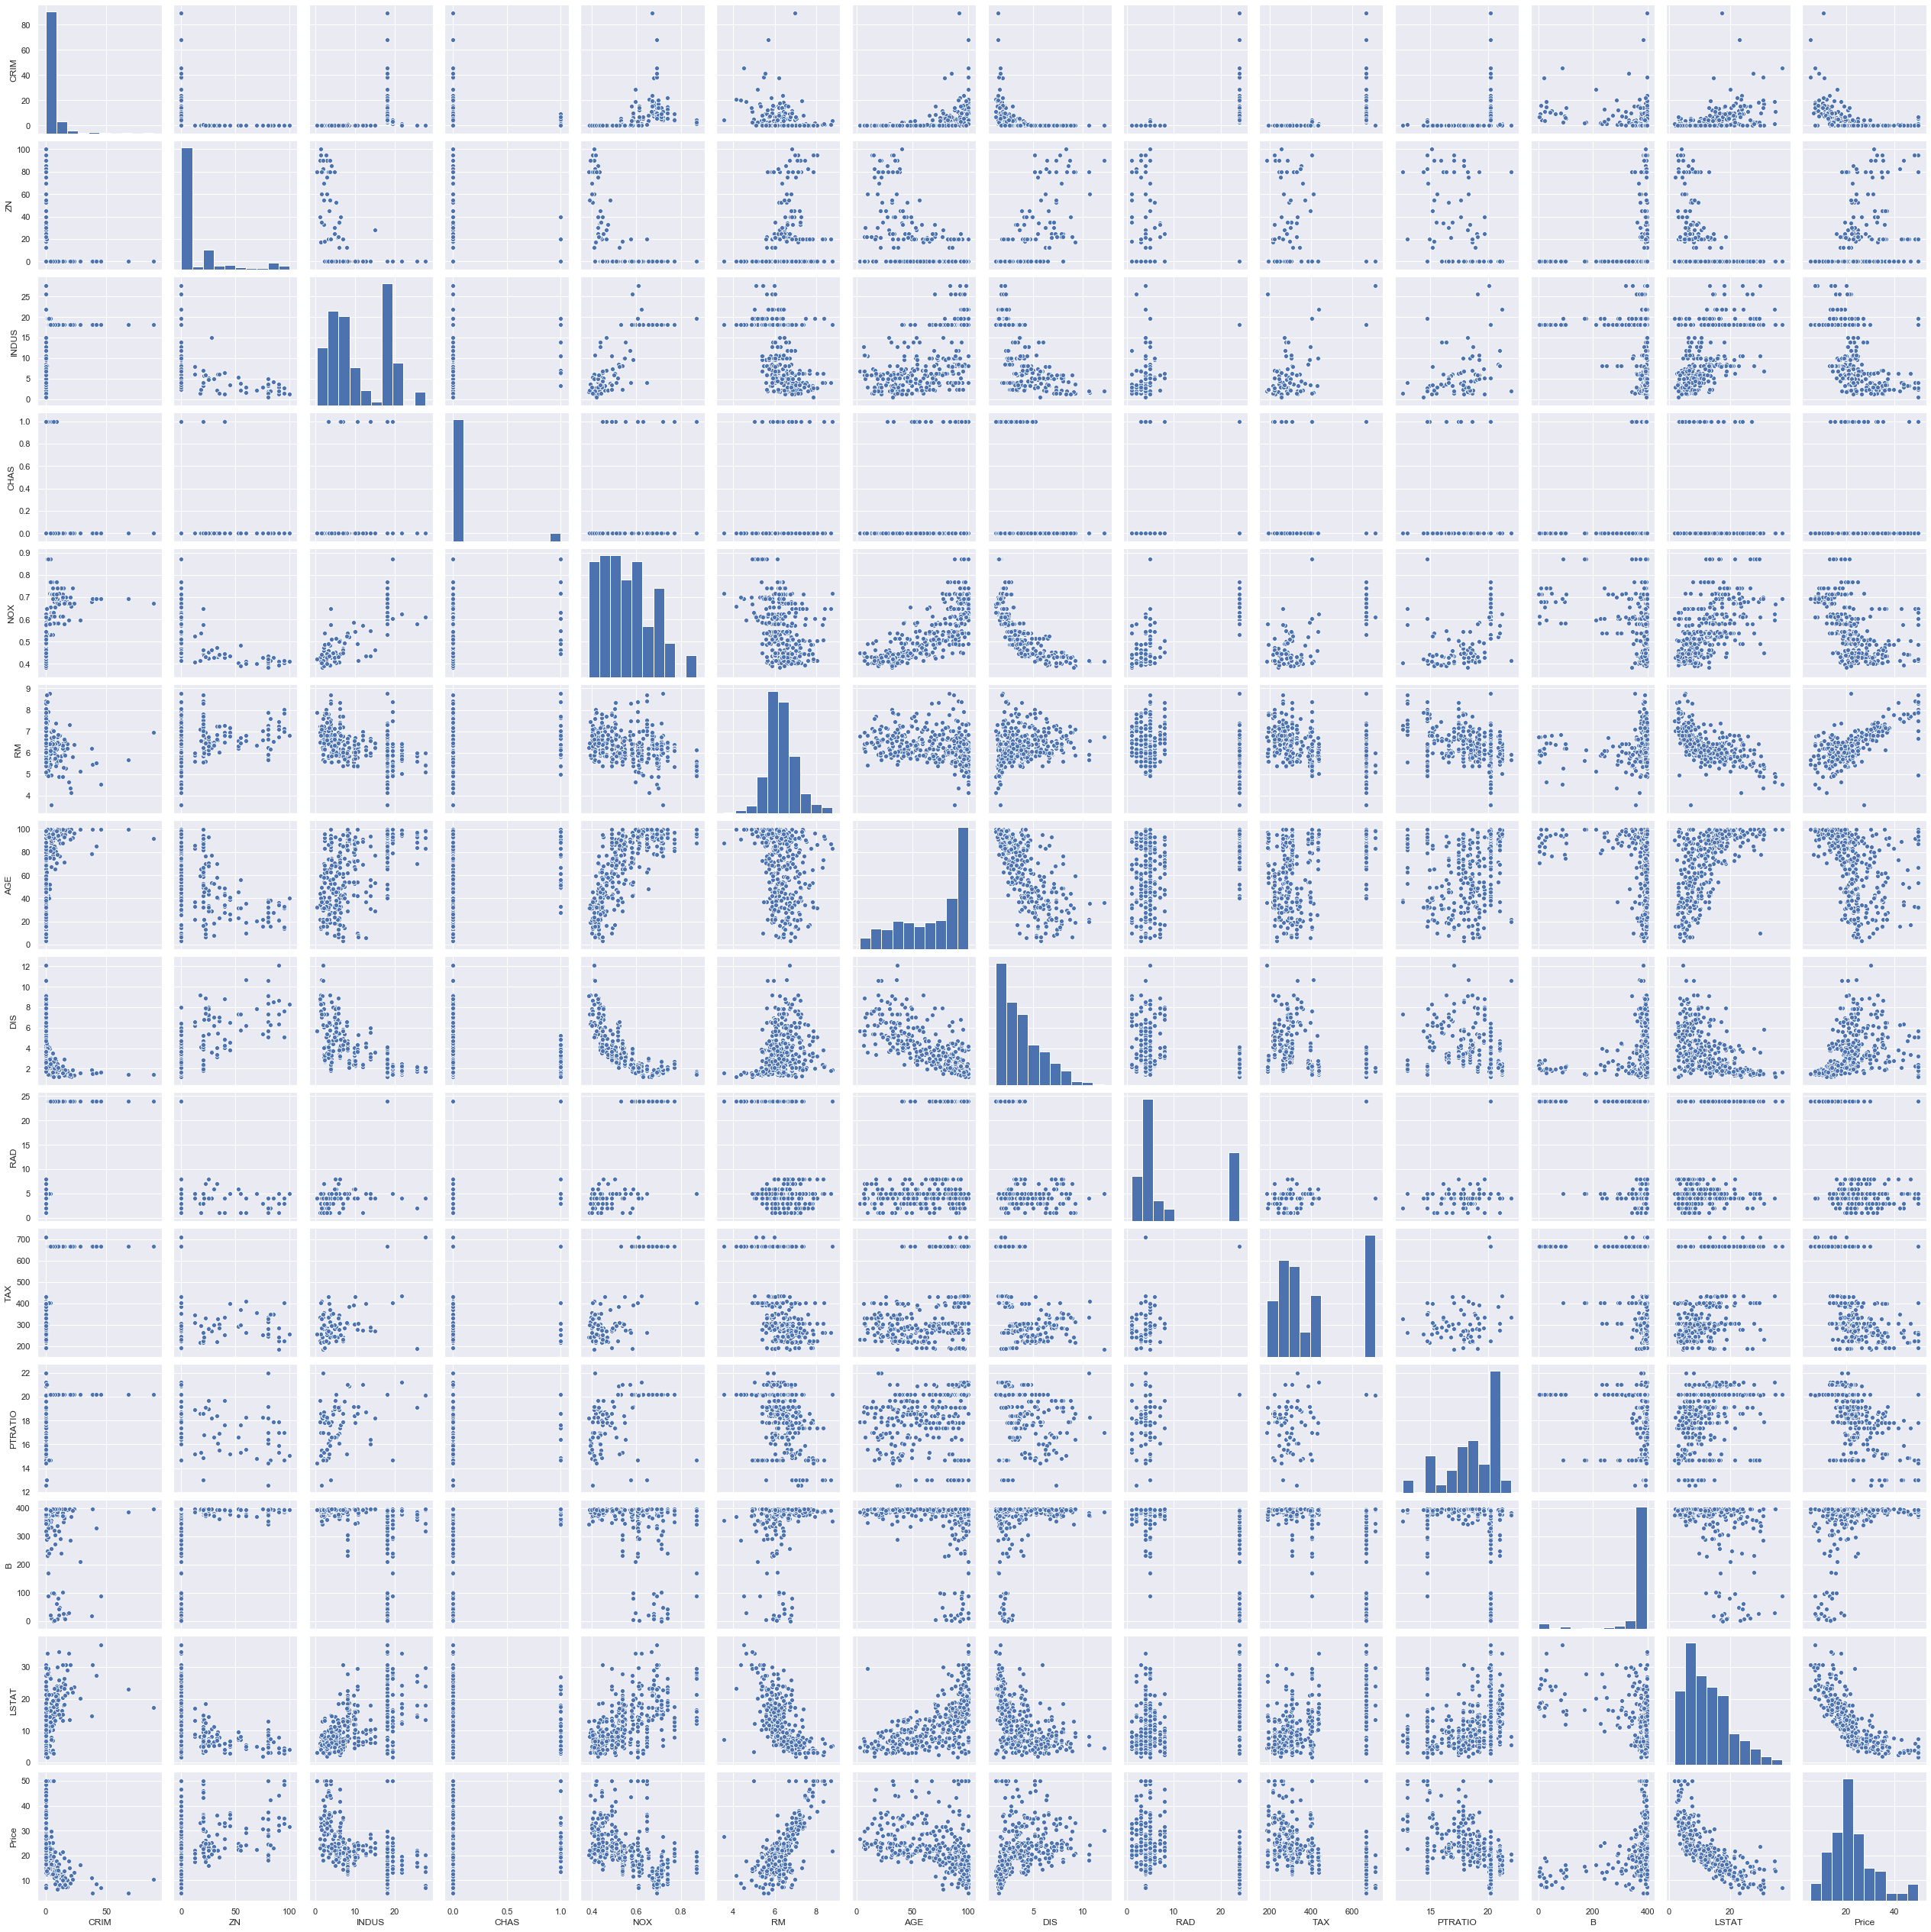

In [123]:
sns.pairplot(train)


In [169]:
pipeline_lasso=Pipeline([('scalar1',StandardScaler()),('lasso',Lasso())])
pipeline_lasso.fit(bos_train_X,bos_train_y)

Pipeline(memory=None,
         steps=[('scalar1',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [171]:
print(lasso.intercept_)
print(lasso.coef_)

44.73153183302302
[-0.05873776  0.04999404 -0.00158882  0.         -0.          0.761785
  0.01304661 -0.71010927  0.19551641 -0.01414771 -0.80524598  0.00709763
 -0.74214555]


In [172]:
def r2metrics(model,X,y):
    mse=mean_squared_error(y,model.predict(X))
    mae=mean_absolute_error(y,model.predict(X))
    rmse=np.sqrt(mean_squared_error(y,model.predict(X)))
    print('mse :{}'.format(mse))
    print('mae :{}'.format(mae))
    print('rmse :{}'.format(rmse))

In [173]:
def plotgraph(model,X_train,y_train,X_test,y_test):
    import seaborn as sns
    sns.set(color_codes=True)
    plt.figure(figsize=(10,9))
    sns.regplot(x=y_test, y=model.predict(X_test),fit_reg=True,scatter_kws={"color": "green"});
    sns.regplot(x=y_train, y=model.predict(X_train),fit_reg=True,scatter_kws={"color": "yellow"});
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title('Train data vs Test Data ')
    plt.show()

In [174]:
r2metrics(pipeline_lasso,bos_test_X,bos_test_y)

mse :35.489636168280335
mae :3.9285318553756823
rmse :5.957317866983458


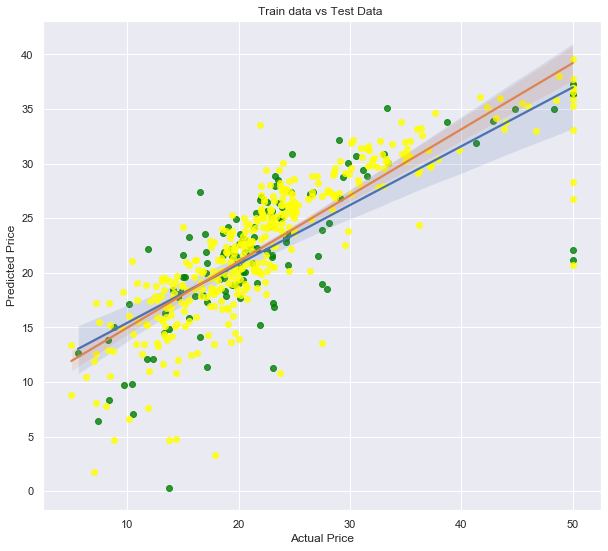

In [175]:
plotgraph(pipeline_lasso,bos_train_X,bos_train_y,bos_test_X,bos_test_y)

In [176]:
pipeline_ridge=Pipeline([('scalar2',StandardScaler()),('ridge',Lasso())])
pipeline_ridge.fit(bos_train_X,bos_train_y)


Pipeline(memory=None,
         steps=[('scalar2',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [177]:
print(ridge.intercept_)
print(ridge.coef_)


31.849731779351092
[-0.11478591  0.04541838 -0.03540308  2.30329133 -8.12744537  3.80634143
 -0.01428219 -1.33693873  0.21674809 -0.01175498 -0.90393728  0.00881273
 -0.50742473]


mse :35.489636168280335
mae :3.9285318553756823
rmse :5.957317866983458


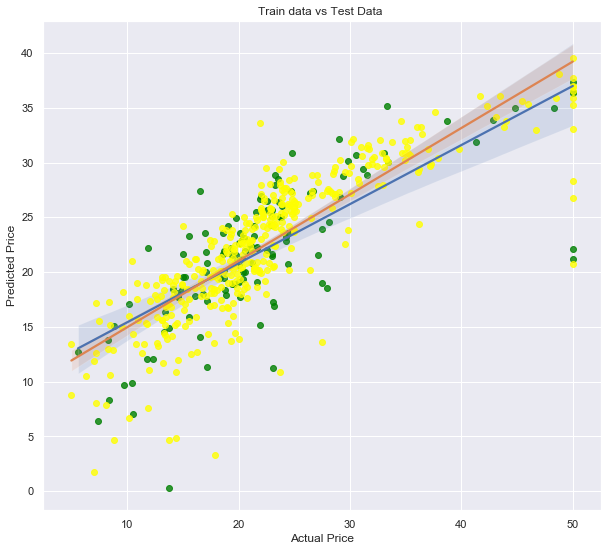

In [178]:
r2metrics(pipeline_ridge,bos_test_X,bos_test_y)
plotgraph(pipeline_ridge,bos_train_X,bos_train_y,bos_test_X,bos_test_y)

In [179]:
bos_train_X.columns
#B,DIS,CHAS,ZN can be deleted--correlation matrix
importance=pd.DataFrame(lasso.coef_,bos_train_X.columns)
importance.reset_index(inplace=True)
importance.columns={'atrribute','coefficient'}
importance
#ZN,INDUS,CHAS,NOX,AGE,RAD,TAX,B

,atrribute,coefficient
0,CRIM,-0.058738
1,ZN,0.049994
2,INDUS,-0.001589
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.761785
6,AGE,0.013047
7,DIS,-0.710109
8,RAD,0.195516
9,TAX,-0.014148


In [180]:
importance[importance['coefficient'].abs()>0.4]

,atrribute,coefficient
5,RM,0.761785
7,DIS,-0.710109
10,PTRATIO,-0.805246
12,LSTAT,-0.742146


In [181]:
bos_train_X.columns
#B,DIS,CHAS,ZN can be deleted--correlation matrix
importance=pd.DataFrame(ridge.coef_,bos_train_X.columns)
importance.reset_index(inplace=True)
importance.columns={'atrribute','coefficient'}
importance
#ZN,INDUS,CHAS,NOX,AGE,RAD,TAX,B

,atrribute,coefficient
0,CRIM,-0.114786
1,ZN,0.045418
2,INDUS,-0.035403
3,CHAS,2.303291
4,NOX,-8.127445
5,RM,3.806341
6,AGE,-0.014282
7,DIS,-1.336939
8,RAD,0.216748
9,TAX,-0.011755


In [182]:
importance[importance['coefficient'].abs()>0.4]

,atrribute,coefficient
3,CHAS,2.303291
4,NOX,-8.127445
5,RM,3.806341
7,DIS,-1.336939
10,PTRATIO,-0.903937
12,LSTAT,-0.507425


In [183]:
train_copy=train.copy()
test_copy=test.copy()

In [184]:
train_copy.columns
#ZN,INDUS,CHAS,NOX,AGE,RAD,TAX,B

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [185]:
X_train=train_copy[['RM', 'DIS', 'PTRATIO', 'LSTAT' ]]
y_train=train_copy['Price']
X_test=test_copy[['RM', 'DIS', 'PTRATIO', 'LSTAT' ]]
y_test=test_copy['Price']


##Training on all columns#

In [186]:
bos_train_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [187]:
#lasso penalizes coeffient
#ridge penalizes the error
#https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499


In [188]:
pipeline_lr=Pipeline([('scalar11',StandardScaler()),('lr_regressor',LinearRegression())])
#('lasso',Lasso())

In [189]:
pipeline_lr.fit(bos_train_X,bos_train_y)

Pipeline(memory=None,
         steps=[('scalar11',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr_regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [191]:
r2metrics(pipeline_lr,bos_test_X,bos_test_y)

mse :29.782245092302325
mae :3.6683301481357153
rmse :5.457311159564051


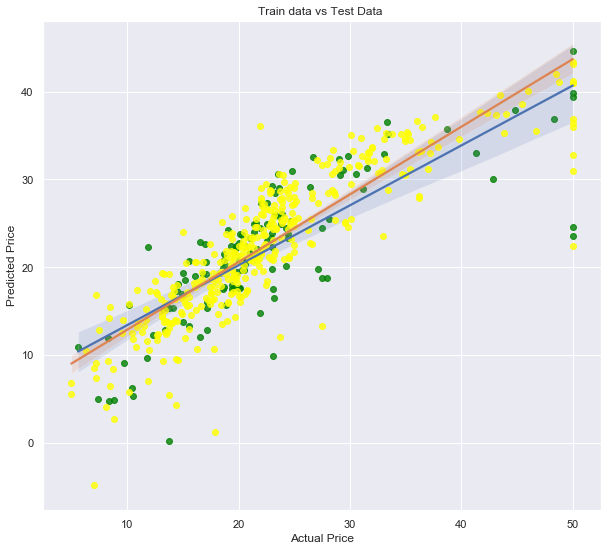

In [194]:
plotgraph(pipeline_lr,bos_train_X,bos_train_y,bos_test_X,bos_test_y)

In [74]:
from keras.wrappers.scikit_learn import KerasRegressor
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [76]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=2)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, bos_train_X, bos_train_y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/50
69/69 - 0s - loss: 602.6121
Epoch 2/50
69/69 - 0s - loss: 316.6179
Epoch 3/50
69/69 - 0s - loss: 44.3256
Epoch 4/50
69/69 - 0s - loss: 26.8191
Epoch 5/50
69/69 - 0s - loss: 24.0762
Epoch 6/50
69/69 - 0s - loss: 21.3466
Epoch 7/50
69/69 - 0s - loss: 19.4240
Epoch 8/50
69/69 - 0s - loss: 17.4538
Epoch 9/50
69/69 - 0s - loss: 16.0392
Epoch 10/50
69/69 - 0s - loss: 14.7845
Epoch 11/50
69/69 - 0s - loss: 13.9531
Epoch 12/50
69/69 - 0s - loss: 12.9944
Epoch 13/50
69/69 - 0s - loss: 12.2727
Epoch 14/50
69/69 - 0s - loss: 11.1287
Epoch 15/50
69/69 - 0s - loss: 11.5503
Epoch 16/50
69/69 - 0s - loss: 10.7907
Epoch 17/50
69/69 - 0s - loss: 10.2242
Epoch 18/50
69/69 - 0s - loss: 10.0845
Epoch 19/50
69/69 - 0s - loss: 9.7961
Epoch 20/50
69/69 - 0s - loss: 9.4807
Epoch 21/50
69/69 - 0s - loss: 9.0031
Epoch 22/50
69/69 - 0s - loss: 9.6520
Epoch 23/50
69/69 - 0s - loss: 9.1801
Epoch 24/50
69/69 - 0s - loss: 8.8173
Epoch 25/50
69/69 - 0s - loss: 8.7796
Epoch 26/50
69/69 - 0s - loss: 9.0125
E

69/69 - 0s - loss: 9.2270
Epoch 14/50
69/69 - 0s - loss: 9.3918
Epoch 15/50
69/69 - 0s - loss: 9.8908
Epoch 16/50
69/69 - 0s - loss: 9.0762
Epoch 17/50
69/69 - 0s - loss: 10.1362
Epoch 18/50
69/69 - 0s - loss: 9.1341
Epoch 19/50
69/69 - 0s - loss: 8.6675
Epoch 20/50
69/69 - 0s - loss: 8.7180
Epoch 21/50
69/69 - 0s - loss: 8.6599
Epoch 22/50
69/69 - 0s - loss: 8.2295
Epoch 23/50
69/69 - 0s - loss: 8.3748
Epoch 24/50
69/69 - 0s - loss: 8.0438
Epoch 25/50
69/69 - 0s - loss: 7.8236
Epoch 26/50
69/69 - 0s - loss: 7.6403
Epoch 27/50
69/69 - 0s - loss: 8.1729
Epoch 28/50
69/69 - 0s - loss: 7.4066
Epoch 29/50
69/69 - 0s - loss: 7.6607
Epoch 30/50
69/69 - 0s - loss: 7.5737
Epoch 31/50
69/69 - 0s - loss: 7.1584
Epoch 32/50
69/69 - 0s - loss: 7.2222
Epoch 33/50
69/69 - 0s - loss: 7.2573
Epoch 34/50
69/69 - 0s - loss: 7.5566
Epoch 35/50
69/69 - 0s - loss: 7.2668
Epoch 36/50
69/69 - 0s - loss: 6.6981
Epoch 37/50
69/69 - 0s - loss: 7.1373
Epoch 38/50
69/69 - 0s - loss: 7.6444
Epoch 39/50
69/69 - 0s 

Epoch 26/50
69/69 - 0s - loss: 7.9793
Epoch 27/50
69/69 - 0s - loss: 7.6753
Epoch 28/50
69/69 - 0s - loss: 7.5328
Epoch 29/50
69/69 - 0s - loss: 7.3822
Epoch 30/50
69/69 - 0s - loss: 7.4080
Epoch 31/50
69/69 - 0s - loss: 7.9869
Epoch 32/50
69/69 - 0s - loss: 7.8804
Epoch 33/50
69/69 - 0s - loss: 7.4723
Epoch 34/50
69/69 - 0s - loss: 7.9706
Epoch 35/50
69/69 - 0s - loss: 7.5867
Epoch 36/50
69/69 - 0s - loss: 7.2733
Epoch 37/50
69/69 - 0s - loss: 7.2405
Epoch 38/50
69/69 - 0s - loss: 6.8492
Epoch 39/50
69/69 - 0s - loss: 6.9413
Epoch 40/50
69/69 - 0s - loss: 7.3852
Epoch 41/50
69/69 - 0s - loss: 6.8812
Epoch 42/50
69/69 - 0s - loss: 6.7413
Epoch 43/50
69/69 - 0s - loss: 7.2994
Epoch 44/50
69/69 - 0s - loss: 7.4275
Epoch 45/50
69/69 - 0s - loss: 6.6494
Epoch 46/50
69/69 - 0s - loss: 6.8079
Epoch 47/50
69/69 - 0s - loss: 6.7680
Epoch 48/50
69/69 - 0s - loss: 6.6342
Epoch 49/50
69/69 - 0s - loss: 6.6033
Epoch 50/50
69/69 - 0s - loss: 6.6014
8/8 - 0s - loss: 8.6655
Epoch 1/50
69/69 - 0s - lo